## Car Price prediction using linear regression from scratch

Importing the necessary libraries like pandas and numpy for exploratory data analysis and data preparation also matplotlib and seaborn for data visualization and analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Importing the car price data and storing it into a dataframe.

In [3]:
df = pd.read_csv("../datasets/Car-Price-Dataset.csv")
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


#### EDA and Data Prepearation

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

The column names are very inconsistent so we will using the string function to make the formatting consistent.

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

Similarly the column values are also very inconsistent so to do further EDA we will make the columns values consistent. But we have two kinds of columns here - numerical and categorical so we will be performing our string operation on categorical values only and for that we need to seperate our the categorical columns from the numerical columns.

In [6]:
categorical_cols = list(df.dtypes[df.dtypes=="object"].index)
categorical_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in categorical_cols:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Let's see the unique values in the each columns to get a better understanding of our data.

In [9]:
for col in df.columns:
    print(f'{col} --> {df[col].unique()[:5]} --> {df[col].nunique()}')
    print()

make --> ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler'] --> 48

model --> ['1_series_m' '1_series' '100' '124_spider' '190-class'] --> 914

year --> [2011 2012 2013 1992 1993] --> 28

engine_fuel_type --> ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'] --> 10

engine_hp --> [335. 300. 230. 320. 172.] --> 356

engine_cylinders --> [ 6.  4.  5.  8. 12.] --> 9

transmission_type --> ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown'] --> 5

driven_wheels --> ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive'] --> 4

number_of_doors --> [ 2.  4.  3. nan] --> 3

market_category --> ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance'] --> 71

vehicle_size --> ['compact' 'midsize' 'large'] --> 3

vehicle_style --> ['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback'] --> 16

highway_mpg --> [26 28 27 25 24] --> 59

c

Here msrp column is one we will be predicting using the other features so let's have a look at the distribution of data in msrp column

<AxesSubplot:xlabel='msrp', ylabel='Count'>

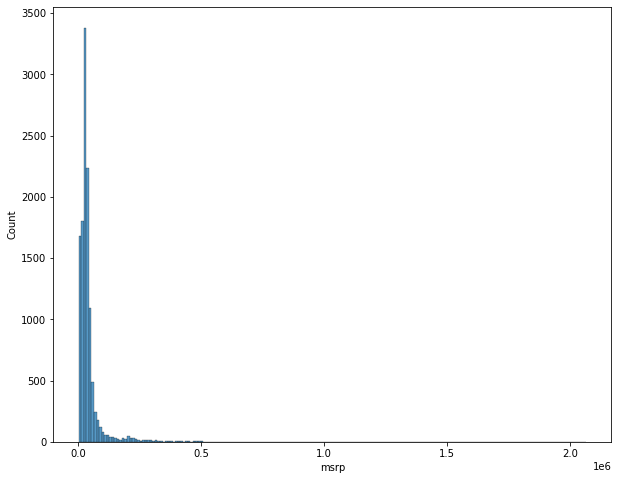

In [10]:
plt.figure(figsize=(10,8))
sns.histplot(df.msrp, bins=200)

From above observation we can see the msrp columns has a long tail distribution. Now let's look at the distribution of msrp with value ranging from 0 to 100k as most of our values lies in this range

<AxesSubplot:xlabel='msrp', ylabel='Count'>

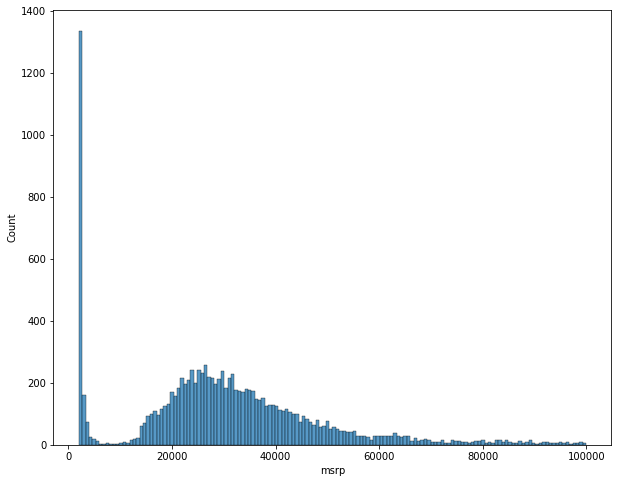

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(df.msrp[df.msrp<100000], bins=150)

In [12]:
df.msrp.var()

3613104336.034846

Since the msrp columns distribution has high variane we will use the logarithmic value of the column to make our prediction and later we can convert them back using exponentiation. This will give us a distribution with less variance and the prediction would be more accurate.

In [13]:
msrp_log = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

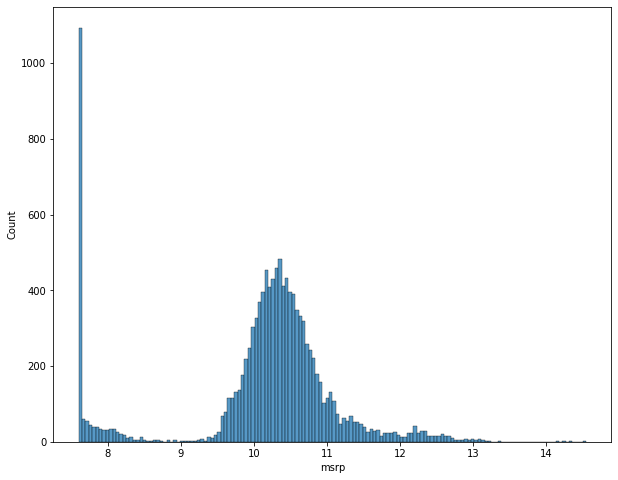

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(msrp_log, bins=150)

Now let's look at the missing values in the dataframe.

In [15]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

#### Splitting the data for prediction and vaidation
We will split the whole dataset into 3 parts in 60/20/20 ratio. We will use 60% of data to train our model, 20% of it to validate the model performance and then we will combine the train and validation data to again train the model and test the model performance on the test data which is the remaining 20%

In [16]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(f'total- {n}, n_train- {n_train}, n_val- {n_val}, n_test- {n_test}')

total- 11914, n_train- 7150, n_val- 2382, n_test- 2382


Since splitting the column index wise could result in sampling bias so to avoid that to some extent we can shuffle the index and split the data into train, test and validation dataset.

In [19]:
index = np.arange(n)
index

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [20]:
np.random.seed(2)
np.random.shuffle(index)

In [21]:
df_train = df.iloc[index[:n_train]]
df_val = df.iloc[index[n_train:n_train+n_val]]
df_test = df.iloc[index[n_train+n_val:]]

In [22]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


Now we can see the index numbers are shuffled so we will reset index for all train, test and validation dataset

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Now lets seperate out the predictor column i.e. msrp column from all datasets.

In [25]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

And we also have to delete the predictior column from the train, validation and test dataset.

In [27]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

#### Implementing Linear Regression